In [30]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import random

In [31]:
df = pd.read_csv('/home/nasibul/Desktop/e-commerce/object-pos/output.csv', index_col=0)
df['Transaction Date and Time'] = pd.to_datetime(df['Transaction Date and Time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97805 entries, 0 to 97804
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Customer Name              97805 non-null  object        
 1   Transaction Date and Time  97805 non-null  datetime64[ns]
 2   Customer Age               97805 non-null  int64         
 3   Location                   97805 non-null  object        
 4   Discount                   97805 non-null  float64       
 5   SKU ID                     97805 non-null  int64         
 6   Quantity                   97805 non-null  int64         
 7   Price                      97805 non-null  float64       
 8   Name                       97805 non-null  object        
 9   Description                97805 non-null  object        
 10  Amount Spent in USD        97805 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage:

In [32]:
df.head(20)

,Customer Name,Transaction Date and Time,Customer Age,Location,Discount,SKU ID,Quantity,Price,Name,Description,Amount Spent in USD
0,Bot #1,2014-04-19 05:21:46,50,Seattle,0.0,32,1,4.0,Peanut Butter,Jiffy Creamy Peanut Butter,4.0
1,Bot #1,2014-04-19 05:21:46,50,Seattle,0.0,3,2,3.0,Milk,Horizon 2% Milk,6.0
2,Bot #1,2014-04-19 05:21:46,50,Seattle,0.0,6,3,3.0,Sandwich Bread,Wonder Bread Sandwich Bread,9.0
3,Bot #1,2014-04-19 05:21:46,50,Seattle,0.0,25,9,1.0,Sweet Peas,Green Giant Sweet Peas,9.0
4,Bot #1,2014-04-19 05:21:46,50,Seattle,0.0,17,1,6.0,Three Cheese Tortellini,Buitoni Three Cheese Tortellini,6.0
5,Bot #1,2014-04-19 05:21:46,50,Seattle,0.0,11,1,4.0,Whole Wheat English Muffin,Oroweat 100% Whole Wheat English Muffin,4.0
6,Bot #1,2014-04-19 05:21:46,50,Seattle,0.0,25,8,1.0,Sweet Peas,Green Giant Sweet Peas,8.0
7,Bot #1,2014-04-19 05:21:46,50,Seattle,0.0,22,4,2.0,Apple Juice,Mott’s Natural Apple Juice,8.0
8,Bot #1,2014-04-19 05:21:46,50,Seattle,0.0,20,9,6.0,Bologna,Wegmans Wunderbar German Deli Bologna,54.0
9,Bot #1,2014-04-19 05:21:46,50,Seattle,0.0,33,7,1.0,Green Beans,Del Monte Green Beans,7.0


Text(0.5, 1.0, 'Top 5 Item Sales from 2018-2020')

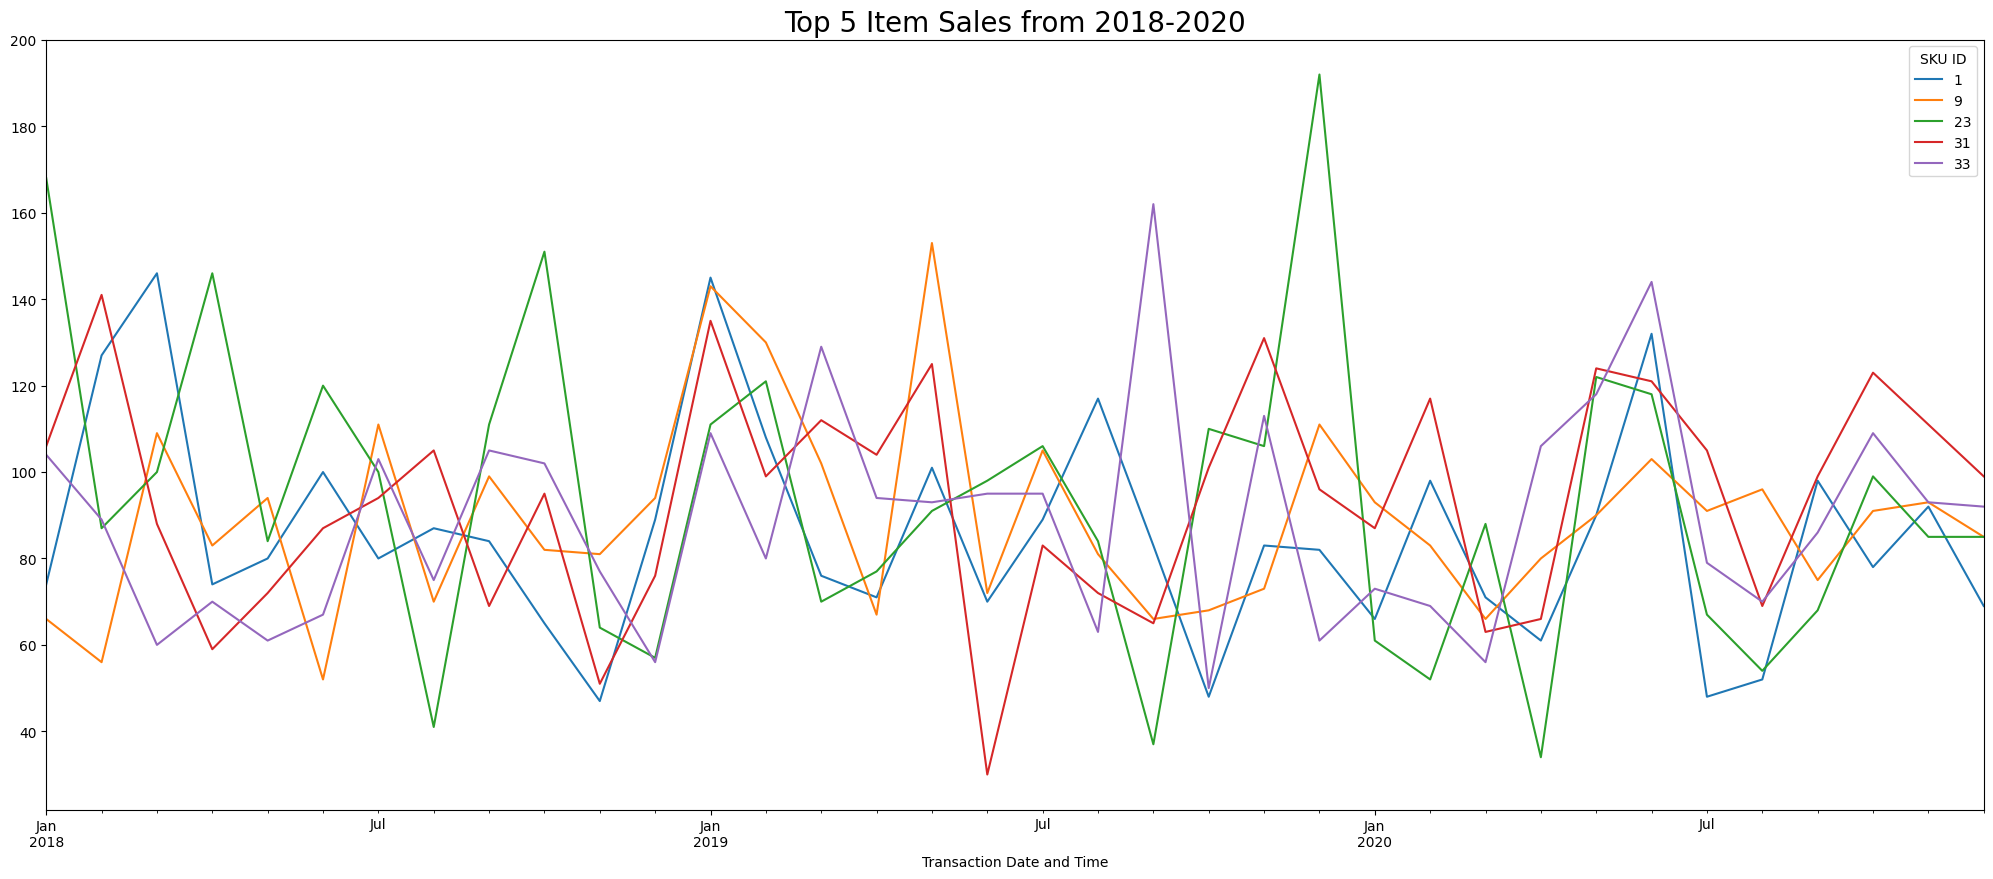

In [33]:
#time series from 2018-2020, top 5 items sold by quantity, daily transaction sold
top_5_sold = list(df.groupby('SKU ID')['Quantity'].sum().sort_values().iloc[0:5].index)
window = df[(df['Transaction Date and Time']>='01-01-2018') & (df['Transaction Date and Time']<='12-31-2020') & (df['SKU ID'].isin(top_5_sold))]
pd.pivot_table(window, values='Quantity', index="Transaction Date and Time", columns=['SKU ID'], aggfunc=np.sum).resample('M').sum().plot(kind='line', figsize=(25,10))
plt.title('Top 5 Item Sales from 2018-2020', size=20)

Text(0.5, 1.0, 'Top 5 Item Revenues from 2018-2020')

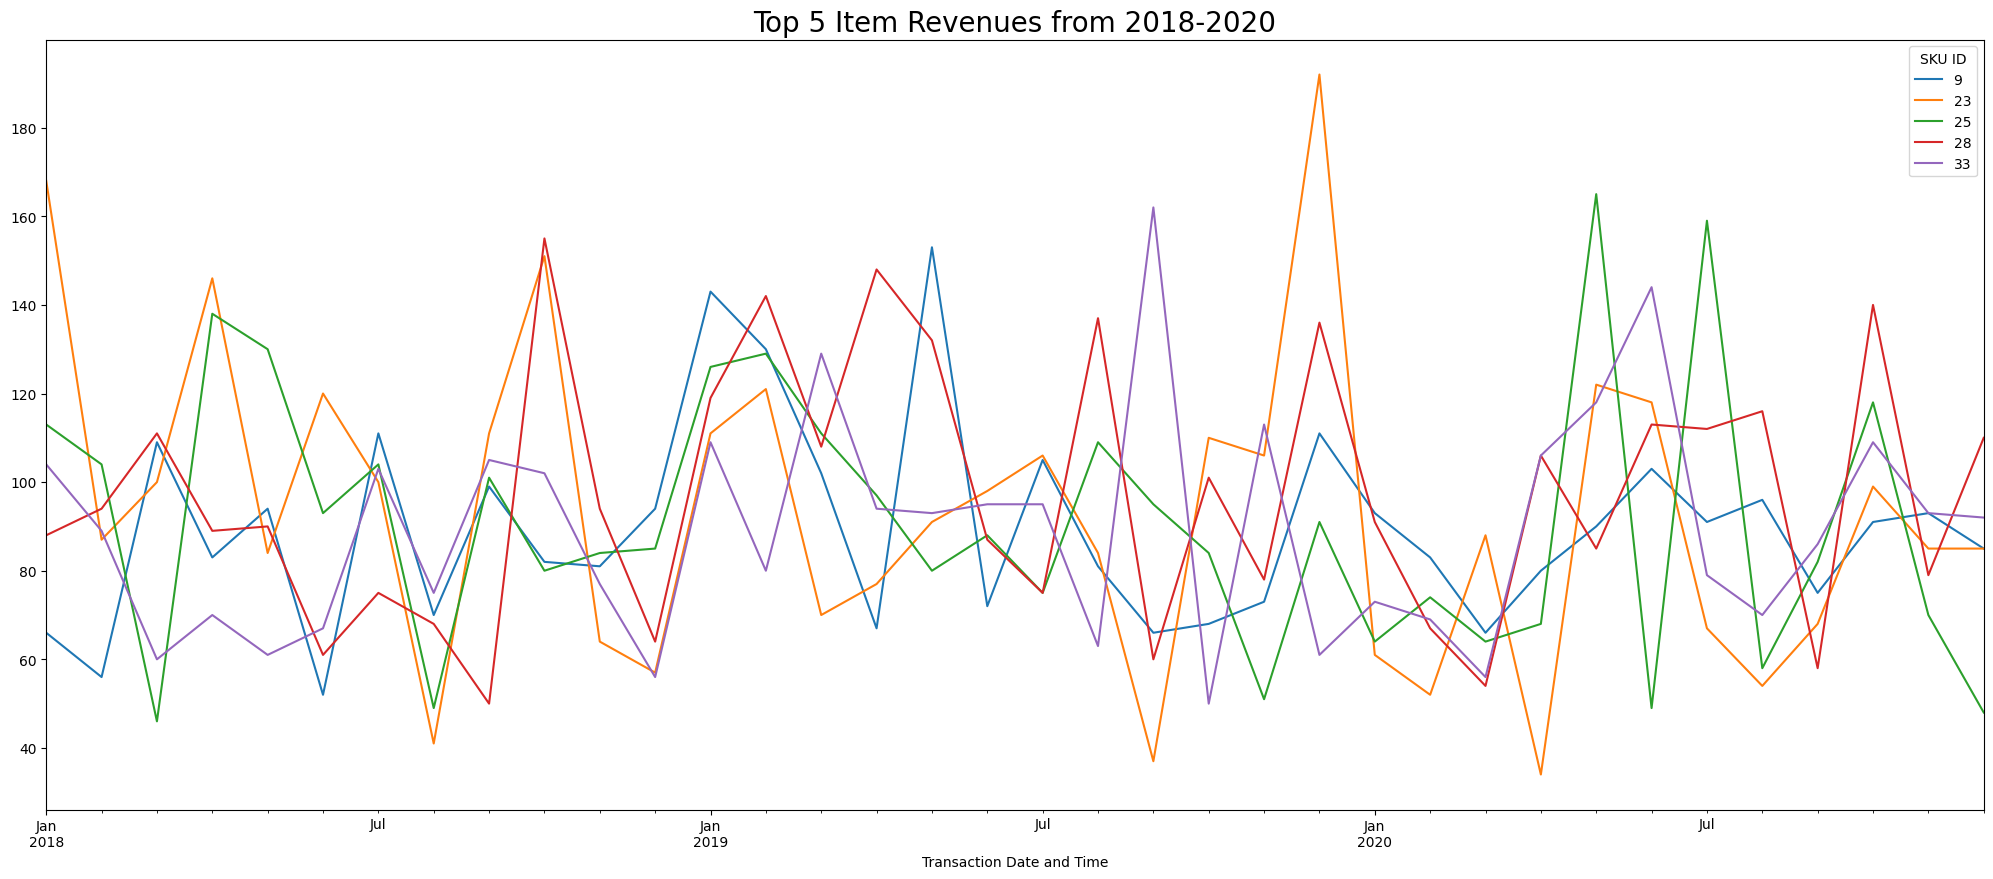

In [34]:
# repeat for top 5 items by revenue
top_5_rev = list(df.groupby('SKU ID')['Amount Spent in USD'].sum().sort_values().iloc[0:5].index)
window = df[(df['Transaction Date and Time']>='01-01-2018') & (df['Transaction Date and Time']<='12-31-2020') & (df['SKU ID'].isin(top_5_rev))]
pd.pivot_table(window, values='Amount Spent in USD', index="Transaction Date and Time", columns=['SKU ID'], aggfunc=np.sum).resample('M').sum().plot(kind='line', figsize=(25,10))
plt.title('Top 5 Item Revenues from 2018-2020', size=20)

Text(0.5, 1.0, 'Top 5 Item Revenues in 2018')

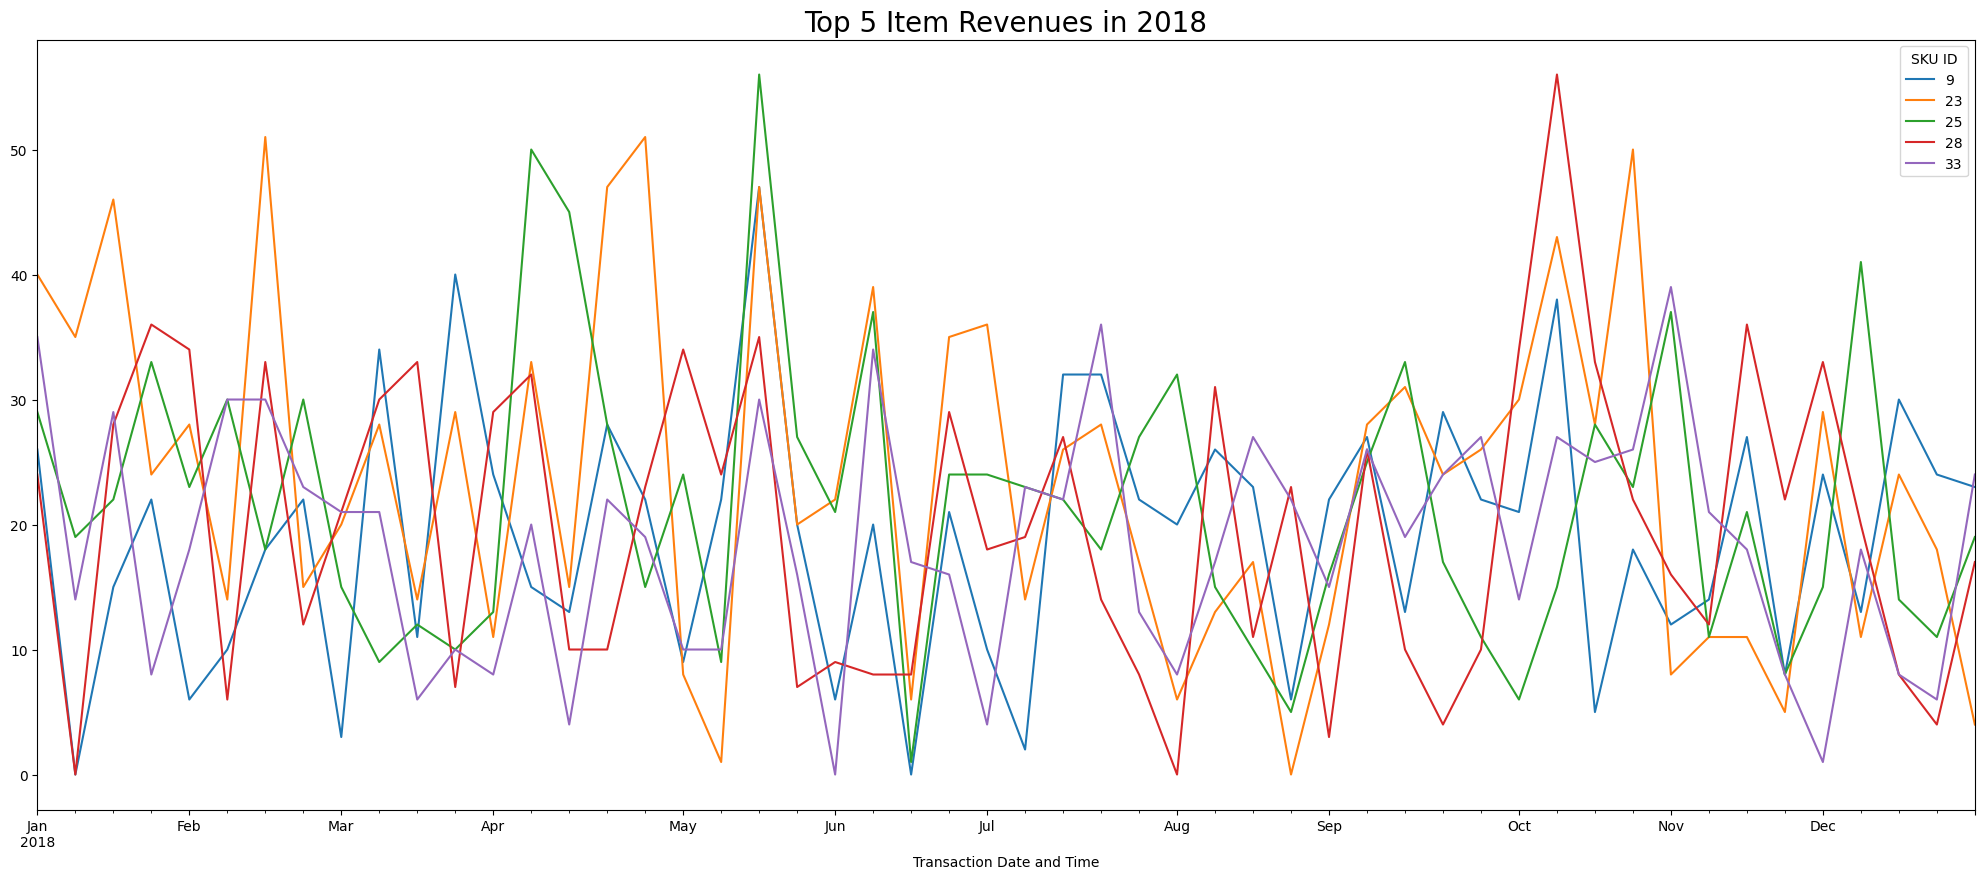

In [35]:
#1st plot is 2018 of top 5 products by revenue
window = df[(df['Transaction Date and Time']>='01-01-2018') & (df['Transaction Date and Time']<='12-31-2018') & (df['SKU ID'].isin(top_5_rev))]
pivot_top_5 = pd.pivot_table(window, values='Amount Spent in USD', index="Transaction Date and Time", columns=['SKU ID'], aggfunc=np.sum)
pivot_top_5.resample('W').sum().plot(kind='line', figsize=(25,10))
plt.title('Top 5 Item Revenues in 2018', size=20)

In [36]:
#2nd plot of 2018 and 2019, bar graph, identify volatile product in terms of sales per week
# identify within this period the most volatile in terms of gross sales per week 
window = df[(df['Transaction Date and Time']>='01-01-2018') & (df['Transaction Date and Time']<='12-31-2019')]
vol = window.groupby('SKU ID').resample('M', on='Transaction Date and Time').std(numeric_only=True).sort_values(by=['Quantity'],ascending=False)[0:20]
vol

,,Customer Age,Discount,SKU ID,Quantity,Price,Amount Spent in USD
SKU ID,Transaction Date and Time,,,,,,
23,2018-08-31,10.737119,0.0,0.0,3.976119,0.0,3.976119
26,2018-09-30,20.524929,0.0,0.0,3.931227,0.0,3.931227
29,2018-05-31,19.433196,0.0,0.0,3.885797,0.0,15.543186
11,2019-10-31,22.277588,0.0,0.0,3.806693,0.0,15.226771
32,2019-02-28,23.407483,0.0,0.0,3.715870,0.0,14.863481
7,2019-11-30,18.232101,0.0,0.0,3.700708,0.0,7.401416
9,2018-01-31,17.437802,0.0,0.0,3.662002,0.0,3.662002
25,2018-08-31,23.377339,0.0,0.0,3.643869,0.0,3.643869
9,2018-10-31,19.147262,0.0,0.0,3.617315,0.0,3.617315


Text(0.5, 1.0, '2018 and 2019 Sales of Most Volatile Product Grouped by Month')

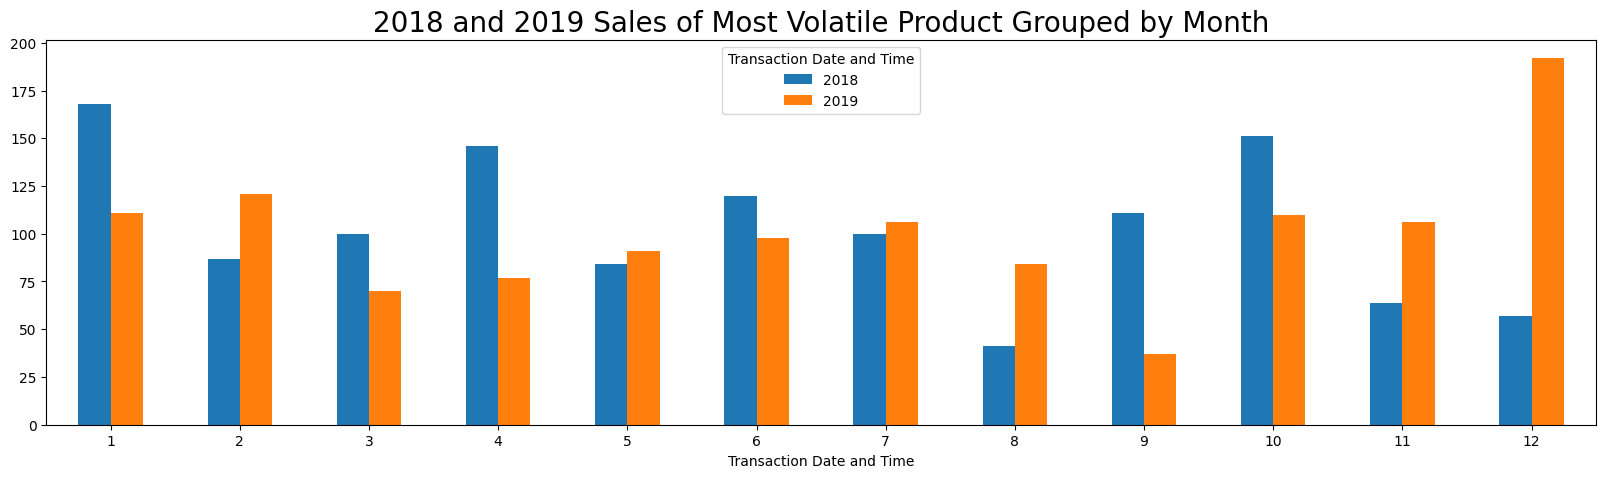

In [37]:
most_vol = vol.index[0][0]
vol_months= window[window["SKU ID"]==most_vol].groupby(by=[window['Transaction Date and Time'].dt.year, window['Transaction Date and Time'].dt.month])\
                                              .sum(numeric_only=True)['Quantity']
vol_months.unstack(level=0).plot(kind='bar', figsize=(20,5), rot=0)
plt.title('2018 and 2019 Sales of Most Volatile Product Grouped by Month', size=20)

In [38]:
vol_months.idxmax()

(2019, 12)

In [39]:
#3rd plot is comparing 2018,2019,2020 histograms of most volatile item
vol_hist_prep = df[(df["SKU ID"]==most_vol) & df['Transaction Date and Time'].dt.year.isin([2018, 2019, 2020])]\
          .groupby(by=[df['Transaction Date and Time'].dt.year, df['Transaction Date and Time'].dt.month])\
          .sum(numeric_only=True)['Quantity']
vol_hist = pd.DataFrame(vol_hist_prep.unstack(level=0))


In [40]:
vol_hist[2018]

Transaction Date and Time
1     168
2      87
3     100
4     146
5      84
6     120
7     100
8      41
9     111
10    151
11     64
12     57
Name: 2018, dtype: int64

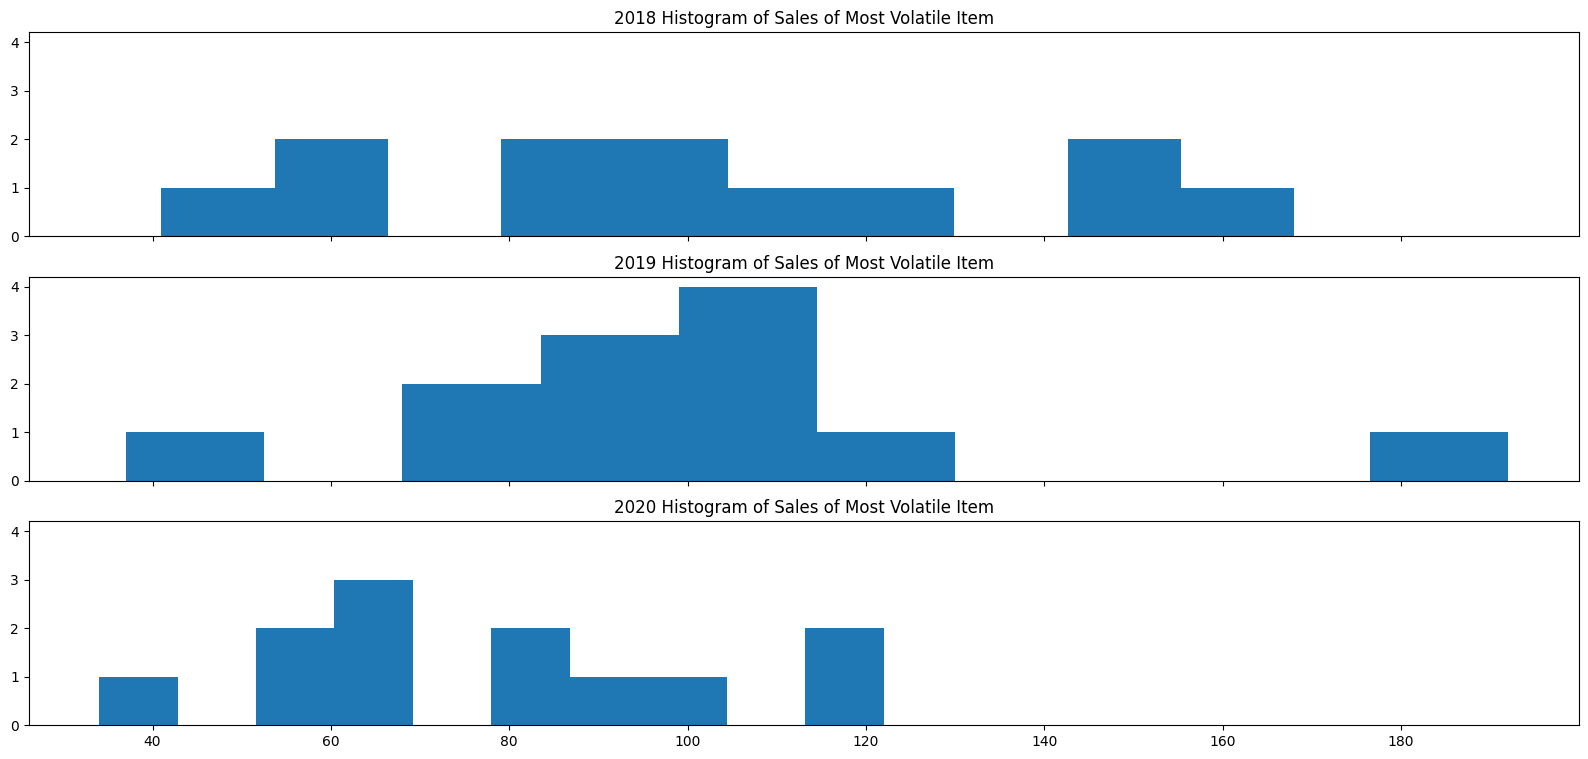

In [47]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, sharex=True, sharey=True)
fig.set_size_inches(20,9)
ax1.hist(vol_hist[2018])
ax1.title.set_text('2018 Histogram of Sales of Most Volatile Item')
ax2.hist(vol_hist[2019])
ax2.title.set_text('2019 Histogram of Sales of Most Volatile Item')
ax3.hist(vol_hist[2020])
ax3.title.set_text('2020 Histogram of Sales of Most Volatile Item')



In [42]:
# 3 new raw data features: discount, weight, volume
df["Item Discount in %"] = [round(random.uniform(10, 30), 2) for i in range(0,len(df))]
df["Weight in grams"] = [round(random.uniform(0, 5000), 2) for i in range(0,len(df))]
df["Volume in liters"] = [round(random.uniform(0, 2), 2) for i in range(0,len(df))]
df

,Customer Name,Transaction Date and Time,Customer Age,Location,Discount,SKU ID,Quantity,Price,Name,Description,Amount Spent in USD,Item Discount in %,Weight in grams,Volume in liters
0,Bot #1,2014-04-19 05:21:46,50,Seattle,0.0,32,1,4.0,Peanut Butter,Jiffy Creamy Peanut Butter,4.0,18.61,1993.39,1.12
1,Bot #1,2014-04-19 05:21:46,50,Seattle,0.0,3,2,3.0,Milk,Horizon 2% Milk,6.0,14.92,4857.68,0.20
2,Bot #1,2014-04-19 05:21:46,50,Seattle,0.0,6,3,3.0,Sandwich Bread,Wonder Bread Sandwich Bread,9.0,13.21,2152.65,1.94
3,Bot #1,2014-04-19 05:21:46,50,Seattle,0.0,25,9,1.0,Sweet Peas,Green Giant Sweet Peas,9.0,23.27,3936.71,1.96
4,Bot #1,2014-04-19 05:21:46,50,Seattle,0.0,17,1,6.0,Three Cheese Tortellini,Buitoni Three Cheese Tortellini,6.0,18.30,728.66,1.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97800,Bot #20914,2014-03-02 17:59:20,68,Washington D.C.,0.0,21,3,7.0,Smoked Ham,Oscar Mayer Deli Style Smoked Ham,21.0,12.21,1403.32,0.30
97801,Bot #20915,2013-07-25 17:20:35,31,Hartford,0.0,21,4,7.0,Smoked Ham,Oscar Mayer Deli Style Smoked Ham,28.0,18.47,3275.45,0.71
97802,Bot #20922,2016-11-24 02:37:34,21,Miami,0.0,21,3,7.0,Smoked Ham,Oscar Mayer Deli Style Smoked Ham,21.0,11.48,3630.29,1.46
97803,Bot #20934,2017-05-06 16:07:38,45,Trenton,0.0,21,1,7.0,Smoked Ham,Oscar Mayer Deli Style Smoked Ham,7.0,18.59,4329.17,1.54


In [49]:
# 3 new composite indexes that make intuitive
df['Total'] = df['Amount Spent in USD']*((100-df['Item Discount in %'])/100)

def weights(x):
    if x < 500:
        return 'Light'
    elif x < 1000:
        return 'Medium'
    else:
        return 'Heavy'

df['Weight Class'] = df['Weight in grams'].apply(weights)

def shipping(x):
    if x == 'Light':
        return 0.05
    elif x == 'Medium':
        return 0.2
    else:
        return 1

df['Shipping Charge'] = df['Weight Class'].apply(shipping)
df
# graphs look pretty
# EDA - statistical signifance
# correlation between price and rev

,Customer Name,Transaction Date and Time,Customer Age,Location,Discount,SKU ID,Quantity,Price,Name,Description,Amount Spent in USD,Item Discount in %,Weight in grams,Volume in liters,Total,Weight Class,Shipping Charge
0,Bot #1,2014-04-19 05:21:46,50,Seattle,0.0,32,1,4.0,Peanut Butter,Jiffy Creamy Peanut Butter,4.0,18.61,1993.39,1.12,3.2556,Heavy,1.0
1,Bot #1,2014-04-19 05:21:46,50,Seattle,0.0,3,2,3.0,Milk,Horizon 2% Milk,6.0,14.92,4857.68,0.20,5.1048,Heavy,1.0
2,Bot #1,2014-04-19 05:21:46,50,Seattle,0.0,6,3,3.0,Sandwich Bread,Wonder Bread Sandwich Bread,9.0,13.21,2152.65,1.94,7.8111,Heavy,1.0
3,Bot #1,2014-04-19 05:21:46,50,Seattle,0.0,25,9,1.0,Sweet Peas,Green Giant Sweet Peas,9.0,23.27,3936.71,1.96,6.9057,Heavy,1.0
4,Bot #1,2014-04-19 05:21:46,50,Seattle,0.0,17,1,6.0,Three Cheese Tortellini,Buitoni Three Cheese Tortellini,6.0,18.30,728.66,1.10,4.9020,Medium,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97800,Bot #20914,2014-03-02 17:59:20,68,Washington D.C.,0.0,21,3,7.0,Smoked Ham,Oscar Mayer Deli Style Smoked Ham,21.0,12.21,1403.32,0.30,18.4359,Heavy,1.0
97801,Bot #20915,2013-07-25 17:20:35,31,Hartford,0.0,21,4,7.0,Smoked Ham,Oscar Mayer Deli Style Smoked Ham,28.0,18.47,3275.45,0.71,22.8284,Heavy,1.0
97802,Bot #20922,2016-11-24 02:37:34,21,Miami,0.0,21,3,7.0,Smoked Ham,Oscar Mayer Deli Style Smoked Ham,21.0,11.48,3630.29,1.46,18.5892,Heavy,1.0
97803,Bot #20934,2017-05-06 16:07:38,45,Trenton,0.0,21,1,7.0,Smoked Ham,Oscar Mayer Deli Style Smoked Ham,7.0,18.59,4329.17,1.54,5.6987,Heavy,1.0


Text(0.5, 1.0, 'Total Sales Graphed Weekly')

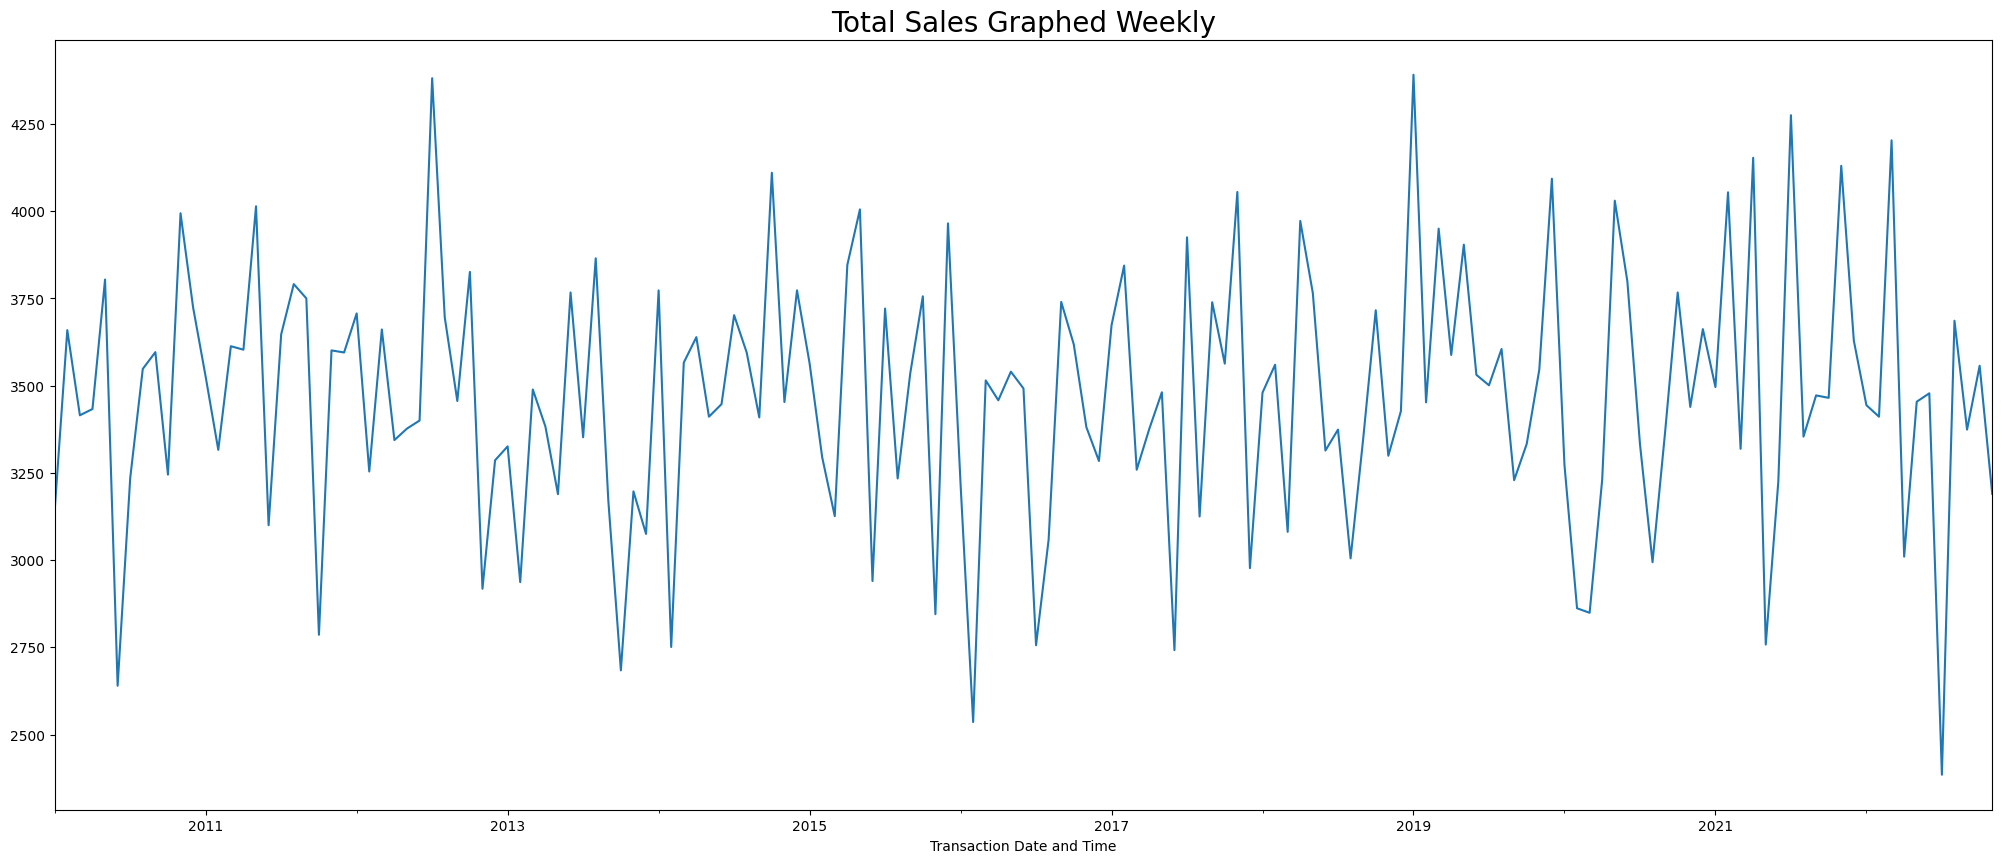

In [50]:
#graph total sales on weekly basis 
df.resample('M', on='Transaction Date and Time').sum(numeric_only=True)['Quantity'].plot(kind='line', figsize=(25,10))
plt.title('Total Sales Graphed Weekly', size=20)